In [1]:
#Packages Used
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

# Exploring the Data

In [3]:
#View first 5 instances
df = pd.read_csv('/home/chris/projects/capstone/higher_ed_summary.csv')
df.head()

,unitid,instname,sector,closed_ind,avg_percent_ft_ug_aid,stddev_percent_ft_ug_aid,min_percent_ft_ug_aid,max_percent_ft_ug_aid,median_percent_ft_ug_aid,slope_percent_ft_ug_aid,...,min_perc_first_time_ug_out_state,max_perc_first_time_ug_out_state,median_perc_first_time_ug_out_state,slope_perc_first_time_ug_out_state,avg_perc_first_time_ug_in_state,stddev_perc_first_time_ug_in_state,min_perc_first_time_ug_in_state,max_perc_first_time_ug_in_state,median_perc_first_time_ug_in_state,slope_perc_first_time_ug_in_state
0,100654,Alabama A & M University,1,0,0.940,0.0306,0.88,0.97,0.955,-0.404762,...,0.31,0.47,0.38,0.243516,0.5980,0.0455,0.52,0.64,0.610,-0.268116
1,100663,University of Alabama at Birmingham,1,0,0.892,0.0402,0.81,0.94,0.895,0.714286,...,0.12,0.14,0.13,1.588235,0.8517,0.0117,0.84,0.87,0.850,-1.243902
2,100690,Amridge University,2,0,0.940,0.1578,0.50,1.00,1.000,-0.058036,...,0.17,0.38,0.17,-0.142857,0.7150,0.1338,0.58,0.83,0.725,0.099628
3,100706,University of Alabama in Huntsville,1,0,0.894,0.0350,0.83,0.94,0.895,0.670290,...,0.14,0.27,0.18,0.228460,0.7640,0.0498,0.71,0.81,0.790,-0.282258
4,100724,Alabama State University,1,0,0.937,0.0254,0.89,0.97,0.935,0.077453,...,0.30,0.45,0.40,0.185714,0.5867,0.0441,0.53,0.66,0.575,-0.123288


In [4]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 394 entries, unitid to slope_perc_first_time_ug_in_state
dtypes: float64(390), int64(3), object(1)
memory usage: 8.1+ MB


In [5]:
#Drop Duplicates
df = df.drop_duplicates(keep='first')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2689 entries, 0 to 2688
Columns: 394 entries, unitid to slope_perc_first_time_ug_in_state
dtypes: float64(390), int64(3), object(1)
memory usage: 8.1+ MB


In [7]:
df.shape

(2689, 394)

In [8]:
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

,unitid,instname,sector,closed_ind,avg_percent_ft_ug_aid,stddev_percent_ft_ug_aid,min_percent_ft_ug_aid,max_percent_ft_ug_aid,median_percent_ft_ug_aid,slope_percent_ft_ug_aid,...,min_perc_first_time_ug_out_state,max_perc_first_time_ug_out_state,median_perc_first_time_ug_out_state,slope_perc_first_time_ug_out_state,avg_perc_first_time_ug_in_state,stddev_perc_first_time_ug_in_state,min_perc_first_time_ug_in_state,max_perc_first_time_ug_in_state,median_perc_first_time_ug_in_state,slope_perc_first_time_ug_in_state
0,100654,Alabama A & M University,1,0,0.940,0.0306,0.88,0.97,0.955,-0.404762,...,0.31,0.47,0.38,0.243516,0.5980,0.0455,0.52,0.64,0.610,-0.268116
1,100663,University of Alabama at Birmingham,1,0,0.892,0.0402,0.81,0.94,0.895,0.714286,...,0.12,0.14,0.13,1.588235,0.8517,0.0117,0.84,0.87,0.850,-1.243902
2,100690,Amridge University,2,0,0.940,0.1578,0.50,1.00,1.000,-0.058036,...,0.17,0.38,0.17,-0.142857,0.7150,0.1338,0.58,0.83,0.725,0.099628
3,100706,University of Alabama in Huntsville,1,0,0.894,0.0350,0.83,0.94,0.895,0.670290,...,0.14,0.27,0.18,0.228460,0.7640,0.0498,0.71,0.81,0.790,-0.282258
4,100724,Alabama State University,1,0,0.937,0.0254,0.89,0.97,0.935,0.077453,...,0.30,0.45,0.40,0.185714,0.5867,0.0441,0.53,0.66,0.575,-0.123288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,490850,East-West University,2,0,0.500,NaN,0.50,0.50,0.500,NaN,...,0.00,0.00,0.00,NaN,1.0000,NaN,1.00,1.00,1.000,NaN
2685,491057,Yeshiva Kollel Tifereth Elizer,2,0,0.775,0.1202,0.69,0.86,0.775,0.058824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2686,491190,The Chicago School of Professional Psychology ...,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2687,491288,University of Wisconsin-Milwaukee Flex,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Class Balance (Closed Schools vs. Open Schools)
np.sum(df['closed_ind'] == 1)

71

In [10]:
np.sum(df['closed_ind'] != 1)

2618

# Feature EDA

In [11]:
#Create Missing Value's Table
missfeatures_count = df.loc[:, ~df.columns.isin(['closed_ind','instname','unitid','sector'])].isnull().sum()
percentage = 100 * df.loc[:, ~df.columns.isin(['closed_ind','instname','unitid','sector'])].isnull().sum() / len(df)
missfeatures = pd.concat([missfeatures_count, percentage], axis=1)

In [12]:
missfeatures = missfeatures.rename(columns = {0 : 'Missing Values', 
1 : 'Percentage'})
missfeatures

,Missing Values,Percentage
avg_percent_ft_ug_aid,481,17.887691
stddev_percent_ft_ug_aid,503,18.705839
min_percent_ft_ug_aid,481,17.887691
max_percent_ft_ug_aid,481,17.887691
median_percent_ft_ug_aid,481,17.887691
...,...,...
stddev_perc_first_time_ug_in_state,550,20.453700
min_perc_first_time_ug_in_state,503,18.705839
max_perc_first_time_ug_in_state,503,18.705839
median_perc_first_time_ug_in_state,503,18.705839


In [13]:
#Features Missing more than 3%
missfeatures = missfeatures[missfeatures.iloc[:,1] > 3].sort_values(
'Percentage', ascending=False).round(1)
missfeatures

,Missing Values,Percentage
slope_cor_rev_perc_loc_appr_gasb,2628,97.7
slope_fte_rev_loc_appr_gasb,2618,97.4
slope_cor_rev_perc_state_appr_gasb,1966,73.1
slope_fte_rev_state_appr_gasb,1965,73.1
stddev_cor_rev_perc_state_appr_gasb,1935,72.0
...,...,...
stddev_cor_exp_perc_other_comb,92,3.4
stddev_cor_exp_perc_inst_serv_comb,92,3.4
stddev_grad_enrollment,87,3.2
stddev_ug_enrollment,87,3.2


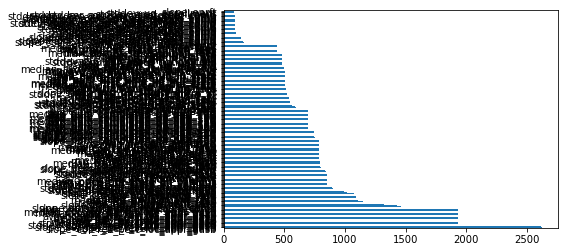

In [14]:
missfeatures['Missing Values'].plot.barh()


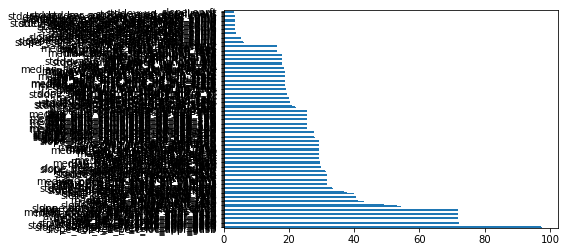

In [15]:
missfeatures['Percentage'].plot.barh()

In [16]:
column_drop_list = missfeatures.index.tolist()
df.drop(column_drop_list, axis=1, inplace=True)

In [17]:
df.shape

(2689, 126)

# School EDA

In [18]:
schools_count = df.isnull().sum(axis=1)
percentages = 100 * df.isnull().sum(axis=1) / len(df.columns)
schools = pd.concat([schools_count, percentages], axis=1)

In [19]:
schools = schools.rename(columns = {0 : 'Missing Values', 
1 : 'Percentages'})

In [20]:
#Instaces Missing more than 50%
schools = schools[schools.iloc[:,1] > 50].sort_values(
'Percentages', ascending=False).round(1)
schools.count()

Missing Values    31
Percentages       31
dtype: int64

In [21]:
#Percentages is 1 , Missing Values is 0
df1 = pd.concat([df,schools_count, percentages], axis=1)

In [22]:
df2 = df1.rename({0: 'missing_values', 1: 'percentages'}, axis=1)

In [23]:
df2

,unitid,instname,sector,closed_ind,avg_enrtot,stddev_enrtot,min_enrtot,max_enrtot,median_enrtot,slope_enrtot,...,avg_ug_enrollment,min_ug_enrollment,max_ug_enrollment,median_ug_enrollment,avg_grad_enrollment,min_grad_enrollment,max_grad_enrollment,median_grad_enrollment,missing_values,percentages
0,100654,Alabama A & M University,1,0,5388.0,415.1913,4853.0,6001.0,5330.0,0.000039,...,4517.5556,4051.0,5038.0,4496.0,925.5556,760.0,1123.0,963.0,0,0.000000
1,100663,University of Alabama at Birmingham,1,0,18217.6,1346.1303,16149.0,20902.0,18166.0,0.000021,...,11682.8889,10646.0,13134.0,11502.0,6898.1111,6228.0,7768.0,7019.0,0,0.000000
2,100690,Amridge University,2,0,683.9,63.1936,597.0,775.0,686.5,-0.000357,...,330.6667,291.0,389.0,322.0,347.5556,303.0,415.0,352.0,0,0.000000
3,100706,University of Alabama in Huntsville,1,0,7815.0,554.3831,7348.0,9101.0,7632.5,0.000037,...,6151.0000,5618.0,7090.0,6005.0,1773.5556,1562.0,2011.0,1730.0,0,0.000000
4,100724,Alabama State University,1,0,5526.0,350.9140,4760.0,6075.0,5541.5,-0.000051,...,4802.5556,4208.0,5356.0,4743.0,697.4444,552.0,926.0,686.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,490850,East-West University,2,0,7.0,NaN,7.0,7.0,7.0,NaN,...,699.5000,7.0,1060.0,755.0,0.0000,0.0,0.0,0.0,4,3.174603
2685,491057,Yeshiva Kollel Tifereth Elizer,2,0,78.0,NaN,78.0,78.0,78.0,NaN,...,78.0000,78.0,78.0,78.0,0.0000,0.0,0.0,0.0,4,3.174603
2686,491190,The Chicago School of Professional Psychology ...,2,0,30.0,NaN,30.0,30.0,30.0,NaN,...,0.0000,0.0,0.0,0.0,30.0000,30.0,30.0,30.0,46,36.507937
2687,491288,University of Wisconsin-Milwaukee Flex,1,0,501.0,NaN,501.0,501.0,501.0,NaN,...,501.0000,501.0,501.0,501.0,0.0000,0.0,0.0,0.0,4,3.174603


In [24]:
df2.shape

(2689, 128)

In [25]:
#Drop instnances with 50% or more missing values
indexMissingValues = df2[df2['missing_values']>64].index
df3 = df2.drop(indexMissingValues)


In [26]:
df3.shape

(2658, 128)

In [27]:
np.sum(df3['closed_ind'] == 1)

66

In [28]:
#Fill in NAN's
df4 = df3.fillna(df3.agg(lambda x: pd.Series.mode(x)[0], axis=0))

In [31]:
df4.isnull().sum()

unitid                    0
instname                  0
sector                    0
closed_ind                0
avg_enrtot                0
                         ..
min_grad_enrollment       0
max_grad_enrollment       0
median_grad_enrollment    0
missing_values            0
percentages               0
Length: 128, dtype: int64

In [32]:
df4.to_csv('posteda.csv')